# Class 11: Ensemble Models in ML


### Objectives
- To learn basic concept of ensemble models
- To get started with the hands-on practise

<b> Instructed By: <font color = blue>Priyanka Roy, CSE'18 </b>

# Import Section

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import *

In [3]:
data = pd.read_csv('heart.csv')

In [4]:
data.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Checking Duplicates and Null values

In [5]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [8]:
data.duplicated().sum()

0

In [9]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Data Cleaning

In [11]:
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease'].values

In [12]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [13]:
y

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

# Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

X = X.apply(LabelEncoder().fit_transform)

X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,0,1,98,0,10,2
1,21,0,2,55,40,0,1,82,0,20,1
2,9,1,1,31,141,0,2,25,0,10,2
3,20,0,0,39,72,0,1,34,1,25,1
4,26,1,2,49,53,0,1,48,0,10,2
...,...,...,...,...,...,...,...,...,...,...,...
913,17,1,3,14,122,0,1,58,0,22,1
914,40,1,0,45,51,1,1,67,0,42,1
915,29,1,0,31,9,0,1,41,1,22,1
916,29,0,1,31,94,0,0,100,0,10,1


# Standardization

In [15]:
StandardScalerModel= StandardScaler()
X = StandardScalerModel.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [17]:
print(X_train.shape, y_train.shape)

(734, 11) (734,)


In [18]:
print(X_test.shape, y_test.shape)

(184, 11) (184,)


# Decision Tree

In [19]:
# Regular DT

# Build unrestricted decision tree
clf = DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=9, random_state=500)
clf.fit(X_train, y_train)

# Predict the labels
pred = clf.predict(X_test)

# Print the confusion matrix
cm = confusion_matrix(y_test, pred)
print('Confusion matrix:\n', cm)

# Print the F1 score
score = f1_score(y_test, pred)
print('F1-Score: {:.3f}'.format(score))

Confusion matrix:
 [[73 13]
 [24 74]]
F1-Score: 0.800


In [20]:
# Build restricted decision tree = WEAK

clf = DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=9, 
random_state=500, max_depth=4, max_features=2)
clf.fit(X_train, y_train)

# Predict the labels
pred = clf.predict(X_test)

# Print the confusion matrix
cm = confusion_matrix(y_test, pred)
print('Confusion matrix:\n', cm)

# Print the F1 score
score = f1_score(y_test, pred)
print('F1-Score: {:.3f}'.format(score))

Confusion matrix:
 [[69 17]
 [16 82]]
F1-Score: 0.832


# Bagging

In [21]:
from sklearn.ensemble import BaggingClassifier

# Instantiate the base model
clf_dt = DecisionTreeClassifier(max_depth = 4)

# Build and train the Bagging classifier
clf_bag = BaggingClassifier(
  estimator = clf_dt,    # base_estimator
  n_estimators = 21,
  random_state=500)
clf_bag.fit(X_train, y_train)

# Predict the labels of the test set
pred = clf_bag.predict(X_test)

# Show the F1-score
print('F1-Score: {:.3f}'.format(f1_score(y_test, pred)))

F1-Score: 0.857


### Out-Of-Bag Score (oob_score)

In [22]:
# Build and train the bagging classifier
clf_bag = BaggingClassifier(
  estimator = clf_dt,
  oob_score = True,
  n_estimators = 21,
  random_state=500)
clf_bag.fit(X_train, y_train)

# Print the out-of-bag score
print('OOB-Score: {:.3f}'.format(clf_bag.oob_score_))

# Evaluate the performance on the test set to compare
pred = clf_bag.predict(X_test)
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, pred)))

OOB-Score: 0.862
Accuracy: 0.848


- As accuracy and oob_score reflects almost same value the model is impressive in generalization purpose (predicts well on unseen data).

### Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
y_pred = rf.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8641304347826086


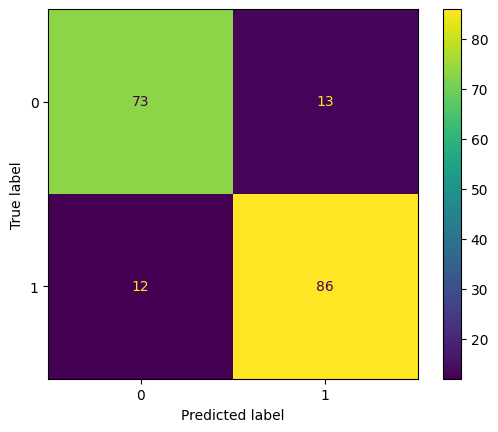

In [26]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Boosting

In [27]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [28]:
# Build and fit linear regression model
reg_lm = LinearRegression()
reg_lm.fit(X_train, y_train)

# Calculate the predictions on the test set
pred = reg_lm.predict(X_test)

# Evaluate the performance using the RMSE
mse = mean_squared_error(pred, y_test)
print('MSE: {:.3f}'.format(mse))

MSE: 0.131


In [29]:
# Build and fit linear regression model
reg_lm = LinearRegression()
reg_lm.fit(X_train, y_train)

# Calculate the predictions on the test set
pred = reg_lm.predict(X_test)

# Evaluate the performance using the RMSE
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE: {:.3f}'.format(rmse))

RMSE: 0.362


### AdaBoost

In [30]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

In [31]:
# Instantiate the default linear regression model
reg_lm = LinearRegression()

# Build and fit an AdaBoost regressor
reg_ada = AdaBoostRegressor(estimator = reg_lm, n_estimators = 12, random_state=500)
reg_ada.fit(X_train, y_train)

# Calculate the predictions on the test set
pred = reg_ada.predict(X_test)

# Evaluate the performance using the RMSE
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE: {:.3f}'.format(rmse))

RMSE: 0.365


### Gradient Boosting

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

# Build and fit a Gradient Boosting classifier
clf_gbm = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state=500)
clf_gbm.fit(X_train, y_train)

# Calculate the predictions on the test set
pred = clf_gbm.predict(X_test)

# Evaluate the performance based on the accuracy
acc = accuracy_score(y_test, pred)
print('Accuracy: {:.3f}'.format(acc))

# Get and show the Confusion Matrix
cm = confusion_matrix(y_test, pred)
print(cm)

Accuracy: 0.864
[[71 15]
 [10 88]]


### XGB

In [33]:
import xgboost as xgb

clf_xgb = xgb.XGBClassifier( n_estimators = 200, learning_rate = 0.001, random_state = 42)

clf_xgb.fit(X_train, y_train)

pred = clf_xgb.predict(X_test)

# Evaluate the performance based on the accuracy
acc = accuracy_score(y_test, pred)
print('Accuracy: {:.3f}'.format(acc))

# Get and show the Confusion Matrix
cm = confusion_matrix(y_test, pred)
print(cm)

Accuracy: 0.853
[[64 22]
 [ 5 93]]


# Voting

In [34]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [35]:
clfKNN = KNeighborsClassifier()
clfLR = LogisticRegression()
clfDT = DecisionTreeClassifier()

In [36]:
voting_model = VotingClassifier(
                estimators = [
                    ('model1', clfKNN),
                    ('model2', clfLR),
                    ('model3', clfDT)
                ])

In [37]:
voting_model.fit(X_train, y_train)

acc = voting_model.score(X_test, y_test)
print("Accuracy:", acc)

Accuracy: 0.8586956521739131


In [38]:
# Calculate the predictions using the voting classifier
from sklearn.metrics import *

pred_vote = voting_model.predict(X_test)

# Calculate the F1-Score of the voting classifier
score_vote = f1_score(y_test, pred_vote)
print('F1-Score: {:.3f}'.format(score_vote))

# Calculate the classification report
report = classification_report(y_test, pred_vote)
print(report)

F1-Score: 0.869
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        86
           1       0.86      0.88      0.87        98

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

